In [ ]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

Reg. Number:23MCA1095
Name:Mukesh Singh Manral
Week:Week 9\


In [ ]:

import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt


x = [2, 2, 8, 5, 7, 6, 1, 4]
y = [10, 5, 4, 8, 5, 4, 2, 9]


data = {'x': x, 'y': y}


df = pd.DataFrame(data)


print(df)


   x   y
0  2  10
1  2   5
2  8   4
3  5   8
4  7   5
5  6   4
6  1   2
7  4   9


In [ ]:


def find_clusters(X, n_clusters, rseed=2):

    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:

        labels = pairwise_distances_argmin(X, centers)


        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])


        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels



In [ ]:
import numpy as np


x = [2, 2, 8, 5, 7, 6, 1, 4]
y = [10, 5, 4, 8, 5, 4, 2, 9]
data = np.array(list(zip(x, y)))

def k_means(X, K):

    centroids = X[np.random.choice(range(X.shape[0]), size=K, replace=False)]

    for _ in range(1):

        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))


        labels = distances.argmin(axis=0)


        for k in range(K):
            centroids[k] = X[labels==k].mean(axis=0)

    return labels, centroids


labels, centroids = k_means(data, 2)
print("Centroids for K=2: ", centroids)


labels, centroids = k_means(data, 3)
print("Centroids for K=3: ", centroids)


Centroids for K=2:  [[7 4]
 [2 6]]
Centroids for K=3:  [[3 9]
 [7 4]
 [1 3]]


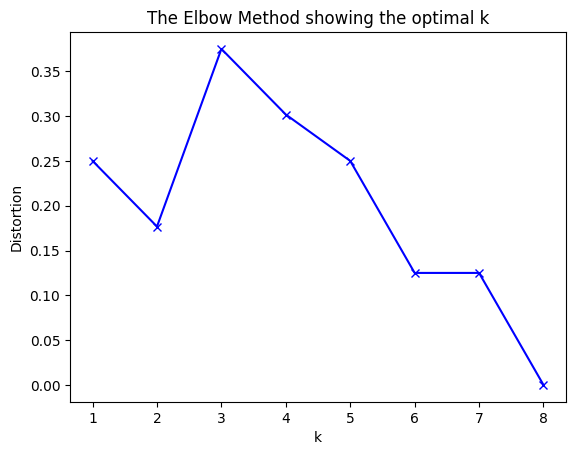

Centroids for K=1:  [[4 5]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = [2, 2, 8, 5, 7, 6, 1, 4]
y = [10, 5, 4, 8, 5, 4, 2, 9]
data = np.array(list(zip(x, y)))

def k_means(X, K):

    centroids = X[np.random.choice(range(X.shape[0]), size=K, replace=False)]

    for _ in range(1):

        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))


        labels = distances.argmin(axis=0)


        for k in range(K):
            centroids[k] = X[labels==k].mean(axis=0)

    return labels, centroids

distortions = []
K = range(1, len(data)+1)
for k in K:
    _, centroids = k_means(data, k)
    distortions.append(sum(np.min(np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)), axis=1)) / data.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


elbow_point = np.where(np.gradient(np.gradient(distortions)) == max(np.gradient(np.gradient(distortions))))[0][0]
optimal_k = elbow_point + 1


labels, centroids = k_means(data, optimal_k)
print("Centroids for K={}: ".format(optimal_k), centroids)


In [ ]:

unique_labels = np.unique(labels)

if len(unique_labels) > 1:

    sil_score = silhouette_score(data, labels)
    print("Silhouette Score: ", sil_score)
else:
    print("Not enough clusters to calculate silhouette score.")


Not enough clusters to calculate silhouette score.


In [ ]:
import numpy as np


x = [2, 2, 8, 5, 7, 6, 1, 4]
y = [10, 5, 4, 8, 5, 4, 2, 9]
data = np.array(list(zip(x, y)))

def k_means_pp(X, K):

    centroids = [X[np.random.choice(range(X.shape[0]))]]

    for _ in range(1, K):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in X])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()

        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break

        centroids.append(X[i])

    return np.array(centroids)


print("Initial centroids for K=2: ", k_means_pp(data, 2))
print("Initial centroids for K=3: ", k_means_pp(data, 3))


Initial centroids for K=2:  [[4 9]
 [7 5]]
Initial centroids for K=3:  [[7 5]
 [4 9]
 [1 2]]


In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, init='k-means++').fit(data)
print("Centroids for K=2: ", kmeans.cluster_centers_)


kmeans = KMeans(n_clusters=3, init='k-means++').fit(data)
print("Centroids for K=3: ", kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids for K=2:  [[3.66666667 9.        ]
 [4.8        4.        ]]
Centroids for K=3:  [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  mukeshsingh.manral2023@vitstudent.ac.in at 2024-03-28 03:32:40
